<a href="https://colab.research.google.com/github/camilagonzalezquevedo/Tarea_2_Mec_Estadist/blob/main/P3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install numpy
!pip install matplotlib

In [1]:
import random
import math
import numpy as np
import matplotlib.pyplot as plt

# **Algoritmo de Metropolis para el modelo de Ising:**

In [2]:
def markov_ising(L, T, nsteps, equilibracion):
    N = L * L
    #condiciones de borde periodicas
    nbr = {i : ((i // L) * L + (i + 1) % L, (i + L) % N,
                (i // L) * L + (i - 1) % L, (i - L) % N) \
                                        for i in range(N)}

    beta = 1.0 / T
    S = [random.choice([1, -1]) for k in range(N)]

    E = -0.5 * sum(S[k] * sum(S[nn] for nn in nbr[k]) for k in range(N))

    E_tot, E2_tot = 0.0, 0.0

    for step in range(nsteps):
        k = random.randint(0, N - 1)
        h = sum(S[nn] for nn in nbr[k])
        delta_E = 2.0 * S[k] * h

        #metropolis
        if random.uniform(0.0, 1.0) < math.exp(-beta * delta_E):
            S[k] *= -1
            E += delta_E

        #acumular la energia despues de la equilibracion
        if step > equilibracion:
            E_tot += E
            E2_tot += E ** 2


    E_av = E_tot / float(nsteps - equilibracion)
    E2_av = E2_tot / float(nsteps - equilibracion)

    c_V = beta ** 2 * (E2_av - E_av ** 2) / float(N)

    return E_av / N, c_V

#energia, calor especifico y temperatura
def simulate_energy_specific_heat(L, T_range, nsteps, equilibracion):
    energies = []
    specific_heats = []

    for T in T_range:
        E_av, c_V = markov_ising(L, T, nsteps, equilibracion)
        energies.append(E_av)
        specific_heats.append(c_V)

    return energies, specific_heats

#parametros
L = 6
nsteps = 200000
equilibracion = 50000
T_range = [0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0]  #temperaturas


energies, specific_heats = simulate_energy_specific_heat(L, T_range, nsteps, equilibracion)


print(f"T\tEnergía por spin (E)\tCalor específico (c_v)")
for T, E, cV in zip(T_range, energies, specific_heats):
    print(f"{T:.1f}\t{E:.4f}\t\t{cV:.4f}")


T	Energía por spin (E)	Calor específico (c_v)
0.5	-2.0000		0.0038
1.0	-1.9967		0.0269
1.5	-1.9499		0.2089
2.0	-1.7622		0.6694
2.5	-1.2624		1.0068
3.0	-0.8835		0.5535
3.5	-0.6912		0.2956
4.0	-0.5601		0.1905


# **Graficas:**

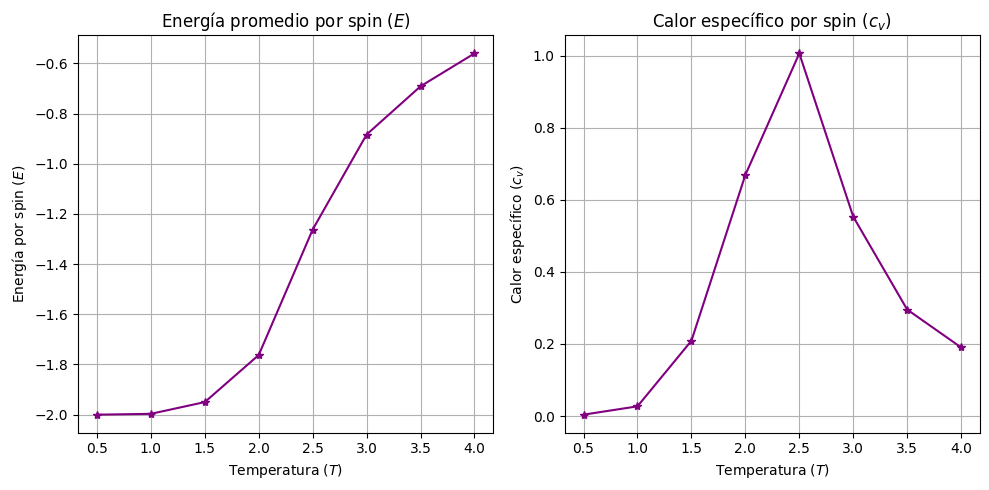

In [3]:
plt.figure(figsize=(10, 5))


plt.subplot(1, 2, 1)
plt.plot(T_range, energies, marker='*', label="Energía promedio", color='purple')
plt.title('Energía promedio por spin $(E)$')
plt.xlabel('Temperatura $(T)$')
plt.ylabel('Energía por spin $(E)$')
plt.grid(True)


plt.subplot(1, 2, 2)
plt.plot(T_range, specific_heats, marker='*', label="Calor específico", color='purple')
plt.title('Calor específico por spin $(c_v)$')
plt.xlabel('Temperatura $(T)$')
plt.ylabel('Calor específico $(c_v)$')
plt.grid(True)

plt.tight_layout()
plt.show()

# **Gráfica de Magnetización:**



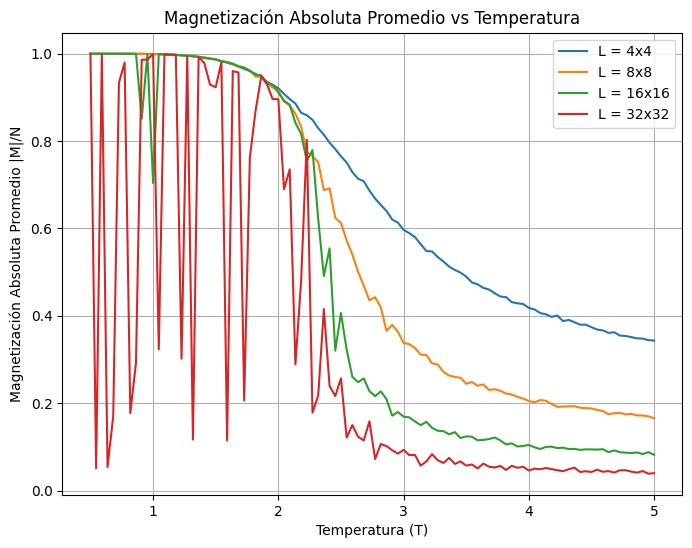

In [13]:
def markov_ising_magnetization(L, T, nsteps, equilibracion):
    N = L * L
    #condiciones periodicas
    nbr = {i : ((i // L) * L + (i + 1) % L, (i + L) % N,
                (i // L) * L + (i - 1) % L, (i - L) % N) \
                                        for i in range(N)}

    beta = 1.0 / T
    S = [random.choice([1, -1]) for k in range(N)]

    E = -0.5 * sum(S[k] * sum(S[nn] for nn in nbr[k]) for k in range(N))

    M_tot = 0.0
    for step in range(nsteps):
        k = random.randint(0, N - 1)
        h = sum(S[nn] for nn in nbr[k])
        delta_E = 2.0 * S[k] * h

        #regla de metropolis
        if random.uniform(0.0, 1.0) < math.exp(-beta * delta_E):
            S[k] *= -1
            E += delta_E

        if step > equilibracion:
            M_tot += abs(sum(S))

    #promedio
    M_av = M_tot / float(nsteps - equilibracion)

    return M_av / N

#magnetizacion en funcion de la temperatura
def simulate_magnetization(L, T_range, nsteps, equilibracion):
    magnetizations = []

    for T in T_range:
        M_av = markov_ising_magnetization(L, T, nsteps, equilibracion)
        magnetizations.append(M_av)

    return magnetizations

#parametros
nsteps = 500000
equilibracion = 100000
T_range = np.linspace(0.5, 5.0, 100)

#redes
L_sizes = [4, 8, 16, 32]


results = {}
for L in L_sizes:
    magnetizations = simulate_magnetization(L, T_range, nsteps, equilibracion)
    results[L] = magnetizations


plt.figure(figsize=(8, 6))

for L in L_sizes:
    plt.plot(T_range, results[L], label=f"L = {L}x{L}")

plt.title("Magnetización Absoluta Promedio vs Temperatura")
plt.xlabel("Temperatura (T)")
plt.ylabel("Magnetización Absoluta Promedio |M|/N")
plt.legend()
plt.grid(True)
plt.show()
